In [1]:
from sklearn import datasets

In [2]:
iris =datasets.load_iris()

In [3]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
import pandas as pd
data = pd.DataFrame(iris.data,columns=iris.feature_names)

In [5]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
classes = pd.DataFrame(iris.target, columns= ['classe'])

In [7]:
dataset = pd.concat([data,classes],axis=1)

In [9]:
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),classe
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
logr = LogisticRegression()

In [12]:
X = dataset.drop('classe',axis=1)
y = dataset['classe']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
logr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
pred = logr.predict(X_test)

In [17]:
import matplotlib.pyplot as plt

In [18]:

%matplotlib inline

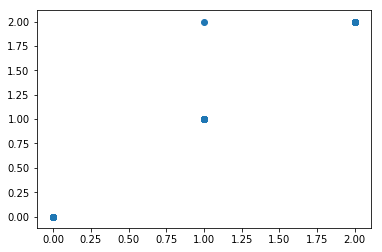

In [19]:
plt.scatter(y_test,pred)
import numpy as np

In [20]:
Xnew = np.array([[6,5.2,3,7.8]])

In [21]:
newPred = logr.predict(Xnew)

In [22]:
newPred

array([2])

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn = KNeighborsClassifier(n_neighbors=5,metric="l2")

In [25]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='l2',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [26]:
kPred = knn.predict(X_test)

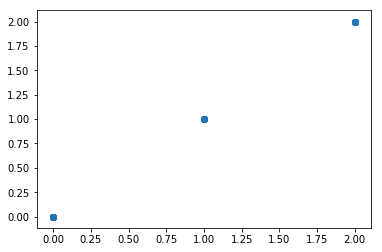

In [27]:
plt.scatter(y_test,kPred)

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
print(classification_report(y_test,kPred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       1.00      1.00      1.00        13
          2       1.00      1.00      1.00        13

avg / total       1.00      1.00      1.00        45



In [86]:
print(confusion_matrix(y_test,kPred))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [87]:
print(confusion_matrix(y_test,pred))

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


In [88]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       1.00      0.92      0.96        13
          2       0.93      1.00      0.96        13

avg / total       0.98      0.98      0.98        45



In [96]:
reviews = pd.read_csv("olist_order_payments_dataset.csv")

In [97]:
reviews.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
